In [1]:
%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
cmap = plt.get_cmap("tab20")
# 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize= 'small')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-small')    # legend fontsize
plt.rc('figure', titlesize='medium')  # fontsize of the figure title

In [4]:
NO_OF_NODES = 10

In [5]:
beno = np.load('beno.npy')
deno = np.load('DENO.npy')
peno = np.load('PENO.npy')
seno = np.load('SENO.npy')
aeno = np.load('AENO.npy')

In [6]:
states_list = beno[:,0]
actions = np.array(beno[:,1])
rewards = np.array(beno[:,2])
for i in range(24,np.int(rewards.shape[0]),24):
    rewards[i-24:i] = rewards[i]

states = np.array([np.array(x) for x in states_list])

batt = states[:,0]
enp = states[:,1]
henergy = states[:,2]
fcast = states[:,3]

beno = np.column_stack((batt,enp,henergy,fcast,actions,rewards))

In [7]:
batt = beno[:,0]
beno_total_downtime = (batt < 0.0055).astype(int)
beno_total_overflow = (batt == 1).astype(int)


In [8]:
batt = deno[:,:,0]
deno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
deno_total_downtime = deno_downtime_occur.sum(axis=0)
deno_total_overflow = overflow_occur.sum(axis=0)


In [9]:
batt = peno[:,:,0]
peno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
peno_total_downtime = peno_downtime_occur.sum(axis=0)
peno_total_overflow = overflow_occur.sum(axis=0)


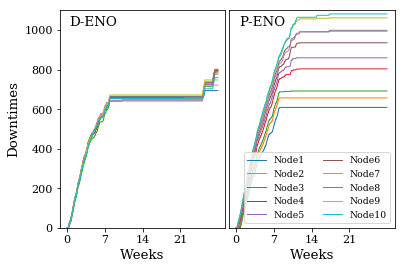

In [10]:
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=None)

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.set_ylim([0,1100])
ax0.set_xlabel('Weeks')
ax0.set_xticks(np.arange(0,24*7*26,24*7*26/4))
ax0.set_xticklabels(np.arange(0,26,7).astype(int));
ax0.set_title('D-ENO', x = 0.2, y=0.9)
ax0.set_ylabel('Downtimes')

ax1.set_ylim([0,1100])
ax1.set_xlabel('Weeks')
ax1.set_xticks(np.arange(0,24*7*26,24*7*26/4))
ax1.set_xticklabels(np.arange(0,26,7).astype(int));
ax1.set_title('P-ENO', x = 0.2, y=0.9)
ax1.set_yticklabels([])
ax1.set_yticks([],[])

for i in range(NO_OF_NODES):
    ax0.plot(deno_downtime_occur[i,0:].cumsum(), alpha=1.0, linewidth=1.0)
    ax1.plot(peno_downtime_occur[i,0:].cumsum(), alpha=1.0, linewidth=1.0)

label = ["Node"+str(i+1) for i in range(10)]
ax1.legend(label,loc = 'lower right',ncol=2)
plt.savefig("unsafe.png",bbox_inches='tight')
plt.savefig("unsafe.pdf",bbox_inches='tight')

In [11]:
batt = seno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
seno_total_downtime = downtime_occur.sum(axis=0)
seno_total_overflow = overflow_occur.sum(axis=0)


In [12]:
batt = aeno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
aeno_total_downtime = downtime_occur.sum(axis=0)
aeno_total_overflow = overflow_occur.sum(axis=0)

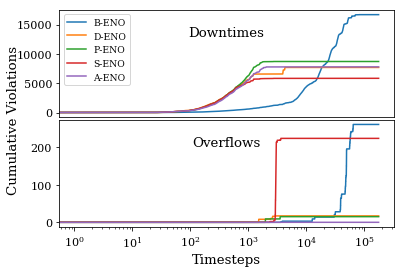

In [13]:
dummy = np.zeros_like(beno_total_downtime)
dummy[:deno_total_downtime.shape[0]] = deno_total_downtime
deno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:peno_total_downtime.shape[0]] = peno_total_downtime
peno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:seno_total_downtime.shape[0]] = seno_total_downtime
seno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:aeno_total_downtime.shape[0]] = aeno_total_downtime
aeno_total_downtime = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
deno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:peno_total_overflow.shape[0]] = peno_total_overflow
peno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
seno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:aeno_total_overflow.shape[0]] = aeno_total_overflow
aeno_total_overflow = dummy




fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

ax = fig.add_subplot(211)
ax.plot(beno_total_downtime.cumsum())
ax.plot(deno_total_downtime.cumsum())
ax.plot(peno_total_downtime.cumsum())
ax.plot(seno_total_downtime.cumsum())
ax.plot(aeno_total_downtime.cumsum())
ax.xaxis.set_ticks_position('none')
ax.set_xscale('log')
ax.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])


fig.text(0.005, 0.5, 'Cumulative Violations', va='center', rotation='vertical', fontsize='small')
ax.set_xlabel('Timesteps')

ax1 = fig.add_subplot(212)
ax1.plot(beno_total_overflow.cumsum())
ax1.plot(deno_total_overflow.cumsum())
ax1.plot(peno_total_overflow.cumsum())
ax1.plot(seno_total_overflow.cumsum())
ax1.plot(aeno_total_overflow.cumsum())
ax1.set_xscale('log')

# ax1.set_ylabel('Cumulative Downtimes')
ax1.set_xlabel('Timesteps')

ax.set_title('Downtimes', x = 0.5, y=0.7)
ax1.set_title('Overflows', x = 0.5, y=0.7)

# fig.tight_layout()
plt.savefig("disasters.png",bbox_inches='tight')
plt.savefig("disasters.pdf",bbox_inches='tight')

In [345]:
dt = beno_total_downtime.sum(),deno_total_downtime.sum(),peno_total_downtime.sum(),seno_total_downtime.sum(),aeno_total_downtime.sum()

In [347]:
dt

(16679, 7681, 8695, 5829, 7779)

In [349]:
np.array(dt)/24

array([694.95833333, 320.04166667, 362.29166667, 242.875     ,
       324.125     ])

In [346]:
ot = beno_total_overflow.sum(),deno_total_overflow.sum(),peno_total_overflow.sum(),seno_total_overflow.sum(),aeno_total_overflow.sum()

In [350]:
ot

(260, 17, 15, 223, 0)

In [351]:
np.array(ot)/365

array([0.71232877, 0.04657534, 0.04109589, 0.6109589 , 0.        ])

In [353]:
20*365

7300

In [341]:
(np.array(dt) + np.array(ot))/24

array([705.79166667, 320.75      , 362.91666667, 252.16666667,
       324.125     ])

In [14]:
# dummy = np.zeros_like(beno_total_overflow)
# dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
# deno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:peno_total_overflow.shape[0]] = peno_total_overflow
# peno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
# seno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:aeno_total_overflow.shape[0]] = aeno_total_overflow
# aeno_total_overflow = dummy



# plt.plot(beno_total_overflow.cumsum())
# plt.plot(deno_total_overflow.cumsum())
# plt.plot(peno_total_overflow.cumsum())
# plt.plot(seno_total_overflow.cumsum())
# plt.plot(aeno_total_overflow.cumsum())

# plt.ylabel('Cumulative Overflows')
# plt.xlabel('Timesteps')
# plt.xscale('log')
# plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])

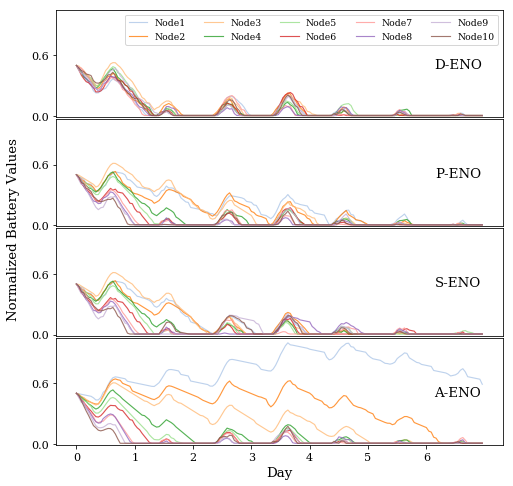

In [15]:
fig, ax = plt.subplots(4, 1, sharex='col', sharey='row',figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

eno = ['D-ENO','P-ENO','S-ENO','A-ENO']
for i in range(4):
        ax[i].set_ylim([-0.01,1.05])    
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].set_title(eno[i], x = 0.9, y=0.4)

ax[0].xaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[2].xaxis.set_ticks_position('none')
ax[3].set_xticks(np.arange(0,24*7,24))
ax[3].set_xticklabels(np.arange(0,7))
ax[3].set_xlabel('Day')
fig.text(0.04, 0.5, 'Normalized Battery Values', va='center', rotation='vertical', fontsize='small')


for i in range(NO_OF_NODES):
    ax[0].plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[1].plot(peno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[2].plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[3].plot(aeno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))


# ax.plot(beno_total_downtime.cumsum())
# ax.plot(deno_total_downtime.cumsum())
# ax.plot(ceno_total_downtime.cumsum())
# ax.plot(seno_total_downtime.cumsum())
# ax.set_xscale('log')

# ax.set_ylabel('Cumulative Downtimes')
# ax.set_xlabel('Timesteps')

label = ["Node"+str(i+1) for i in range(10)]
ax[0].legend(label,loc = 'upper right',ncol=5)
# fig.tight_layout()
plt.savefig("init_Batts.png",bbox_inches='tight')
plt.savefig("init_Batts.pdf",bbox_inches='tight')

In [16]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [17]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [18]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [19]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [20]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [21]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

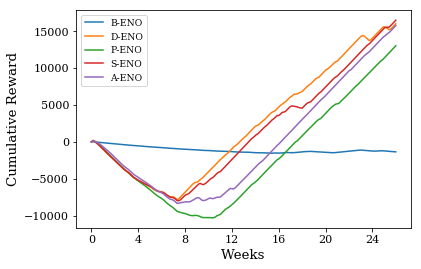

In [22]:
deno_all_node_reward = deno[:,:,-1].sum(axis=0)
peno_all_node_reward = peno[:,:,-1].sum(axis=0)
seno_all_node_reward = seno[:,:,-1].sum(axis=0)
aeno_all_node_reward = aeno[:,:,-1].sum(axis=0)


fig = plt.figure()
plt.plot(beno[0:26*7*24,-1].cumsum())
plt.plot(deno_all_node_reward.cumsum())
plt.plot(peno_all_node_reward.cumsum())
plt.plot(seno_all_node_reward.cumsum())
plt.plot(aeno_all_node_reward.cumsum())

plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])

plt.xlabel('Weeks')
plt.xticks(np.arange(0,24*26*7,24*28),np.arange(0,26,4).astype(int));
plt.ylabel('Cumulative Reward')
plt.savefig("cum_reward.png",bbox_inches='tight')
plt.savefig("cum_reward.pdf",bbox_inches='tight')

In [248]:
# #calculated 4-way variance as cov(A,B,C,D) = E[ (A - E(A)) . (B - E(B)) . (C - E(C)) . (D - E(D)) ]
# def var4(chunk):
#     b_dev = chunk[:,0] - chunk[:,0].mean()
# #     e_dev = chunk[:,1] - chunk[:,1].mean()
#     h_dev = chunk[:,2] - chunk[:,2].mean()
# #     f_dev = chunk[:,3] - chunk[:,3].mean()
# #     cov4 = np.mean(np.multiply(np.multiply(b_dev,e_dev),np.multiply(h_dev,f_dev)))
#     cov4 = np.mean(np.multiply(b_dev,h_dev))
#     return cov4

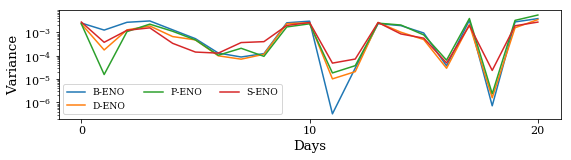

In [251]:
# DAY_LEN = 21
# fig = plt.figure(figsize=(9,2))


# states = beno[0:24*DAY_LEN,0:4]
# chunklist = (np.split(states,DAY_LEN))
# beno_var = np.array([var4(i) for i in chunklist])
# # plt.plot(np.abs(beno_var))

# states = deno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# deno_var = np.array([var4(i) for i in chunklist])
# plt.plot(np.abs(deno_var))

# states = peno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# peno_var = np.array([var4(i) for i in chunklist])
# plt.plot(np.abs(peno_var))

# states = seno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# seno_var = np.array([var4(i) for i in chunklist])
# plt.plot(np.abs(seno_var))

# states = aeno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# aeno_var = np.array([var4(i) for i in chunklist])
# plt.plot(np.abs(aeno_var))

# plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO','A-ENO'],ncol=3)

# plt.xlabel('Days')
# plt.xticks(np.arange(0,DAY_LEN,10),np.arange(0,DAY_LEN,10).astype(int));
# plt.ylabel('Variance')
# plt.savefig("variance.png",bbox_inches='tight')
# plt.savefig("variance.pdf",bbox_inches='tight')


# plt.yscale('log')

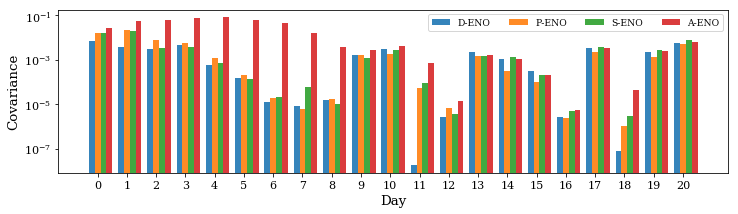

In [302]:
# DAY_LEN = 21

# states = deno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# dcov = [np.cov(x[:,0],x[:,3])[0,0] for x in chunklist]

# states = peno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# pcov = [np.cov(x[:,0],x[:,3])[0,0] for x in chunklist]

# states = seno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# scov = [np.cov(x[:,0],x[:,3])[0,0] for x in chunklist]

# states = aeno[:,0:24*DAY_LEN,0:4]
# day_wise = np.einsum('nde->dne',states).reshape(-1,4)
# chunklist = (np.split(day_wise,DAY_LEN))
# acov = [np.cov(x[:,0],x[:,3])[0,0] for x in chunklist]



# n_groups = DAY_LEN
# # create plot
# fig= plt.subplots(figsize=(12,3))
# index = np.arange(n_groups)
# bar_width = 0.2
# opacity = 0.9

# rects1 = plt.bar(index, dcov, bar_width,
# alpha=opacity,
# color=cmap(0),
# label='D-ENO')

# rects2 = plt.bar(index + bar_width, pcov, bar_width,
# alpha=opacity,
# color=cmap(2),
# label='P-ENO')

# rects3 = plt.bar(index + bar_width*2, scov, bar_width,
# alpha=opacity,
# color=cmap(4),
# label='S-ENO')

# rects4 = plt.bar(index + bar_width*3, acov, bar_width,
# alpha=opacity,
# color=cmap(6),
# label='A-ENO')

# plt.yscale('log')
# plt.xlabel('Day')
# plt.ylabel('Covariance')
# plt.xticks(index + bar_width, np.arange(0,DAY_LEN))
# plt.legend(ncol=4)

# plt.show()

In [328]:
DAY_LEN = 100

states = deno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
dcov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN*24)]

states = peno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
pcov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN*24)]

states = seno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
scov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN*24)]

states = aeno[:,0:24*DAY_LEN,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
acov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN*24)]

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  """
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Degrees of freedom <= 0 for sli

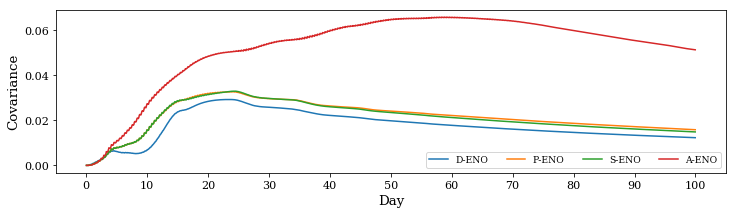

In [331]:
# create plot
fig= plt.subplots(figsize=(12,3))
plt.plot(dcov)
plt.plot(pcov)
plt.plot(scov)
plt.plot(acov)
# plt.yscale('log')
plt.xlabel('Day')
plt.ylabel('Covariance')
labels = ['D-ENO', 'P-ENO','S-ENO','A-ENO']
plt.legend(labels,ncol=4)
plt.xticks(np.arange(0,(1+DAY_LEN)*24,10*24), np.arange(0,DAY_LEN+1,10))
plt.savefig("variance.png",bbox_inches='tight')
plt.savefig("variance.pdf",bbox_inches='tight')
plt.show()


In [25]:
beno_test = np.array([0,2, 0, 1,3,0,0,1,0,0,5,0,0,0, 3,7,0, 0,1]).cumsum()
deno_test = np.array([0,0,44,30,0,0,0,0,0,0,0,0,0,0,12,0,0,15,0]).cumsum()
peno_test = np.array([2,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 1,2,0, 0,0]).cumsum()
seno_test = np.array([0,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 0,0,0, 0,0]).cumsum()
aeno_test = np.array([0,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 0,0,0, 0,0]).cumsum()

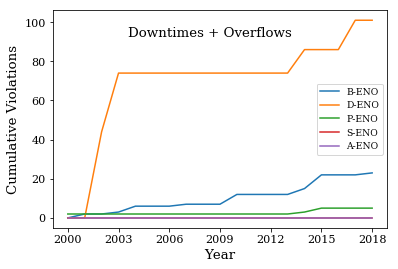

In [324]:
import seaborn as sns
fig = plt.figure()
plt.plot(beno_test)
plt.plot(deno_test)
plt.plot(peno_test)
plt.plot(seno_test)
plt.plot(aeno_test)

plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])
plt.xticks(np.arange(0,19,3),np.arange(2000,2019,3).astype(int))
plt.xlabel('Year')
plt.ylabel('Cumulative Violations')
fig.text(0.3, 0.8, 'Downtimes + Overflows', va='center',  fontsize='small')
plt.savefig("cum_viol.png",bbox_inches='tight')
plt.savefig("cum_viol.pdf",bbox_inches='tight')


In [161]:
x = deno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.009468013638869337

In [163]:
x = peno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.012129103126149118

In [164]:
x = seno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.011350862321061087

In [165]:
x = aeno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.03969432977969024

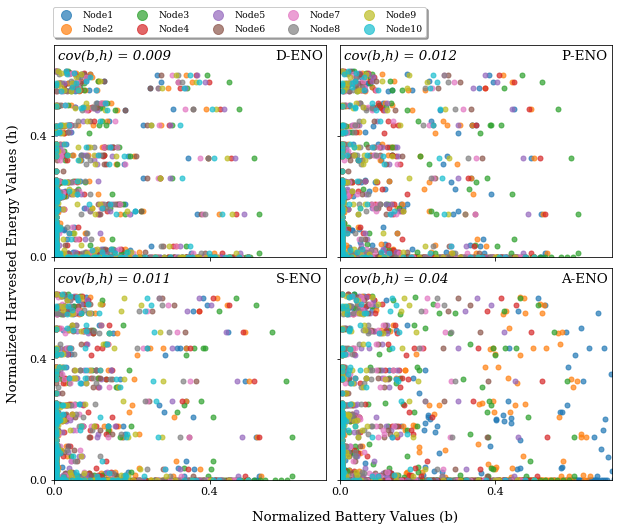

In [326]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

DAY_LEN = 14*24
eno = [['D-ENO','P-ENO'],['S-ENO','A-ENO']]
cov = [[0.009,0.012],[0.011,0.040]]
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlim([0,0.7])
        ax[i][j].set_ylim([0,0.7])
        ax[i][j].xaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i][j].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i][j].set_title(eno[i][j], x = 0.9, y=0.9)
        ax[i][j].text(0.01,0.65,
                      'cov(b,h) = '+ str(cov[i][j]),
                      fontsize='small',
                     style='italic',)
        


sz = 100
alfa = 0.7
        
for i in range(NO_OF_NODES):

    ax[0][0].scatter(deno[i,0:DAY_LEN,0],
                    deno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    ax[0][1].scatter(peno[i,0:DAY_LEN,0],
                    peno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)    
    ax[1][0].scatter(seno[i,0:DAY_LEN,0],
                    seno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    ax[1][1].scatter(aeno[i,0:DAY_LEN,0],
                    aeno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    
label = ["Node"+str(i+1) for i in range(10)]
ax[0][0].legend(label,loc = 'upper left',ncol=5,bbox_to_anchor=(-0.02, 1.2),shadow=True, fancybox=True, markerscale=2)

fig.text(0.06, 0.5, 'Normalized Harvested Energy Values (h)', va='center', rotation='vertical', fontsize='small')
fig.text(0.4, 0.06, 'Normalized Battery Values (b)', va='center', fontsize='small')

plt.savefig("spread.png",bbox_inches='tight')
plt.savefig("spread.pdf",bbox_inches='tight')

In [344]:
np.array([.009, .012, .011, .04])/.009

array([1.        , 1.33333333, 1.22222222, 4.44444444])

In [354]:
694.96/324.13


2.144077993397711

In [355]:
7300/182


40.10989010989011

In [356]:
101/24


4.208333333333333